In [1]:
%pwd

'/Users/ryandevera/data-science/umn_environments/Constrained-Deep-Learning-Survey/notebooks'

In [2]:
%cd ..

/Users/ryandevera/.virtualenvs/cdl-survey/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/ryandevera/data-science/umn_environments/Constrained-Deep-Learning-Survey


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from cdlsurvey.data import get_data, discretize_continuous_columns, get_data

%matplotlib inline

In [4]:
# Define the columns that we want to use
# Categorical columns
CATEGORICAL_COLUMNS = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native_country',
]

# Continuous columns
CONTINUOUS_COLUMNS = [
    'age',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'education_num',
]

# All columns
COLUMNS = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket',
]

# label column
LABEL_COLUMN = 'label'

In [5]:
train_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'  # noqa
test_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'  # noqa

# Get the train and test data
train_df = pd.read_csv(train_filename, names=COLUMNS, skipinitialspace=True)
test_df = pd.read_csv(test_filename, names=COLUMNS, skipinitialspace=True, skiprows=1)

# Create the label column - the label is for the income bracket column
# and we identify anyone who makes over $50k
train_df[LABEL_COLUMN] = (
    train_df['income_bracket'].apply(lambda x: '>50K' in x)
).astype(int)
test_df[LABEL_COLUMN] = (
    test_df['income_bracket'].apply(lambda x: '>50K' in x)
).astype(int)

In [6]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


# Plots of Categorical Distributions

Let's start our exploratory data analysis by visualizing the distributions of the categorial variables.

In the context of fairness we notice that `white` is the main race in the dataset. We also observe that there are more males in the dataset than females.

The label that we are predicting is also imblanced but not heavily imbalanced.

One thing we might actually want to clean up from the data are the `?` at least for this experiment.

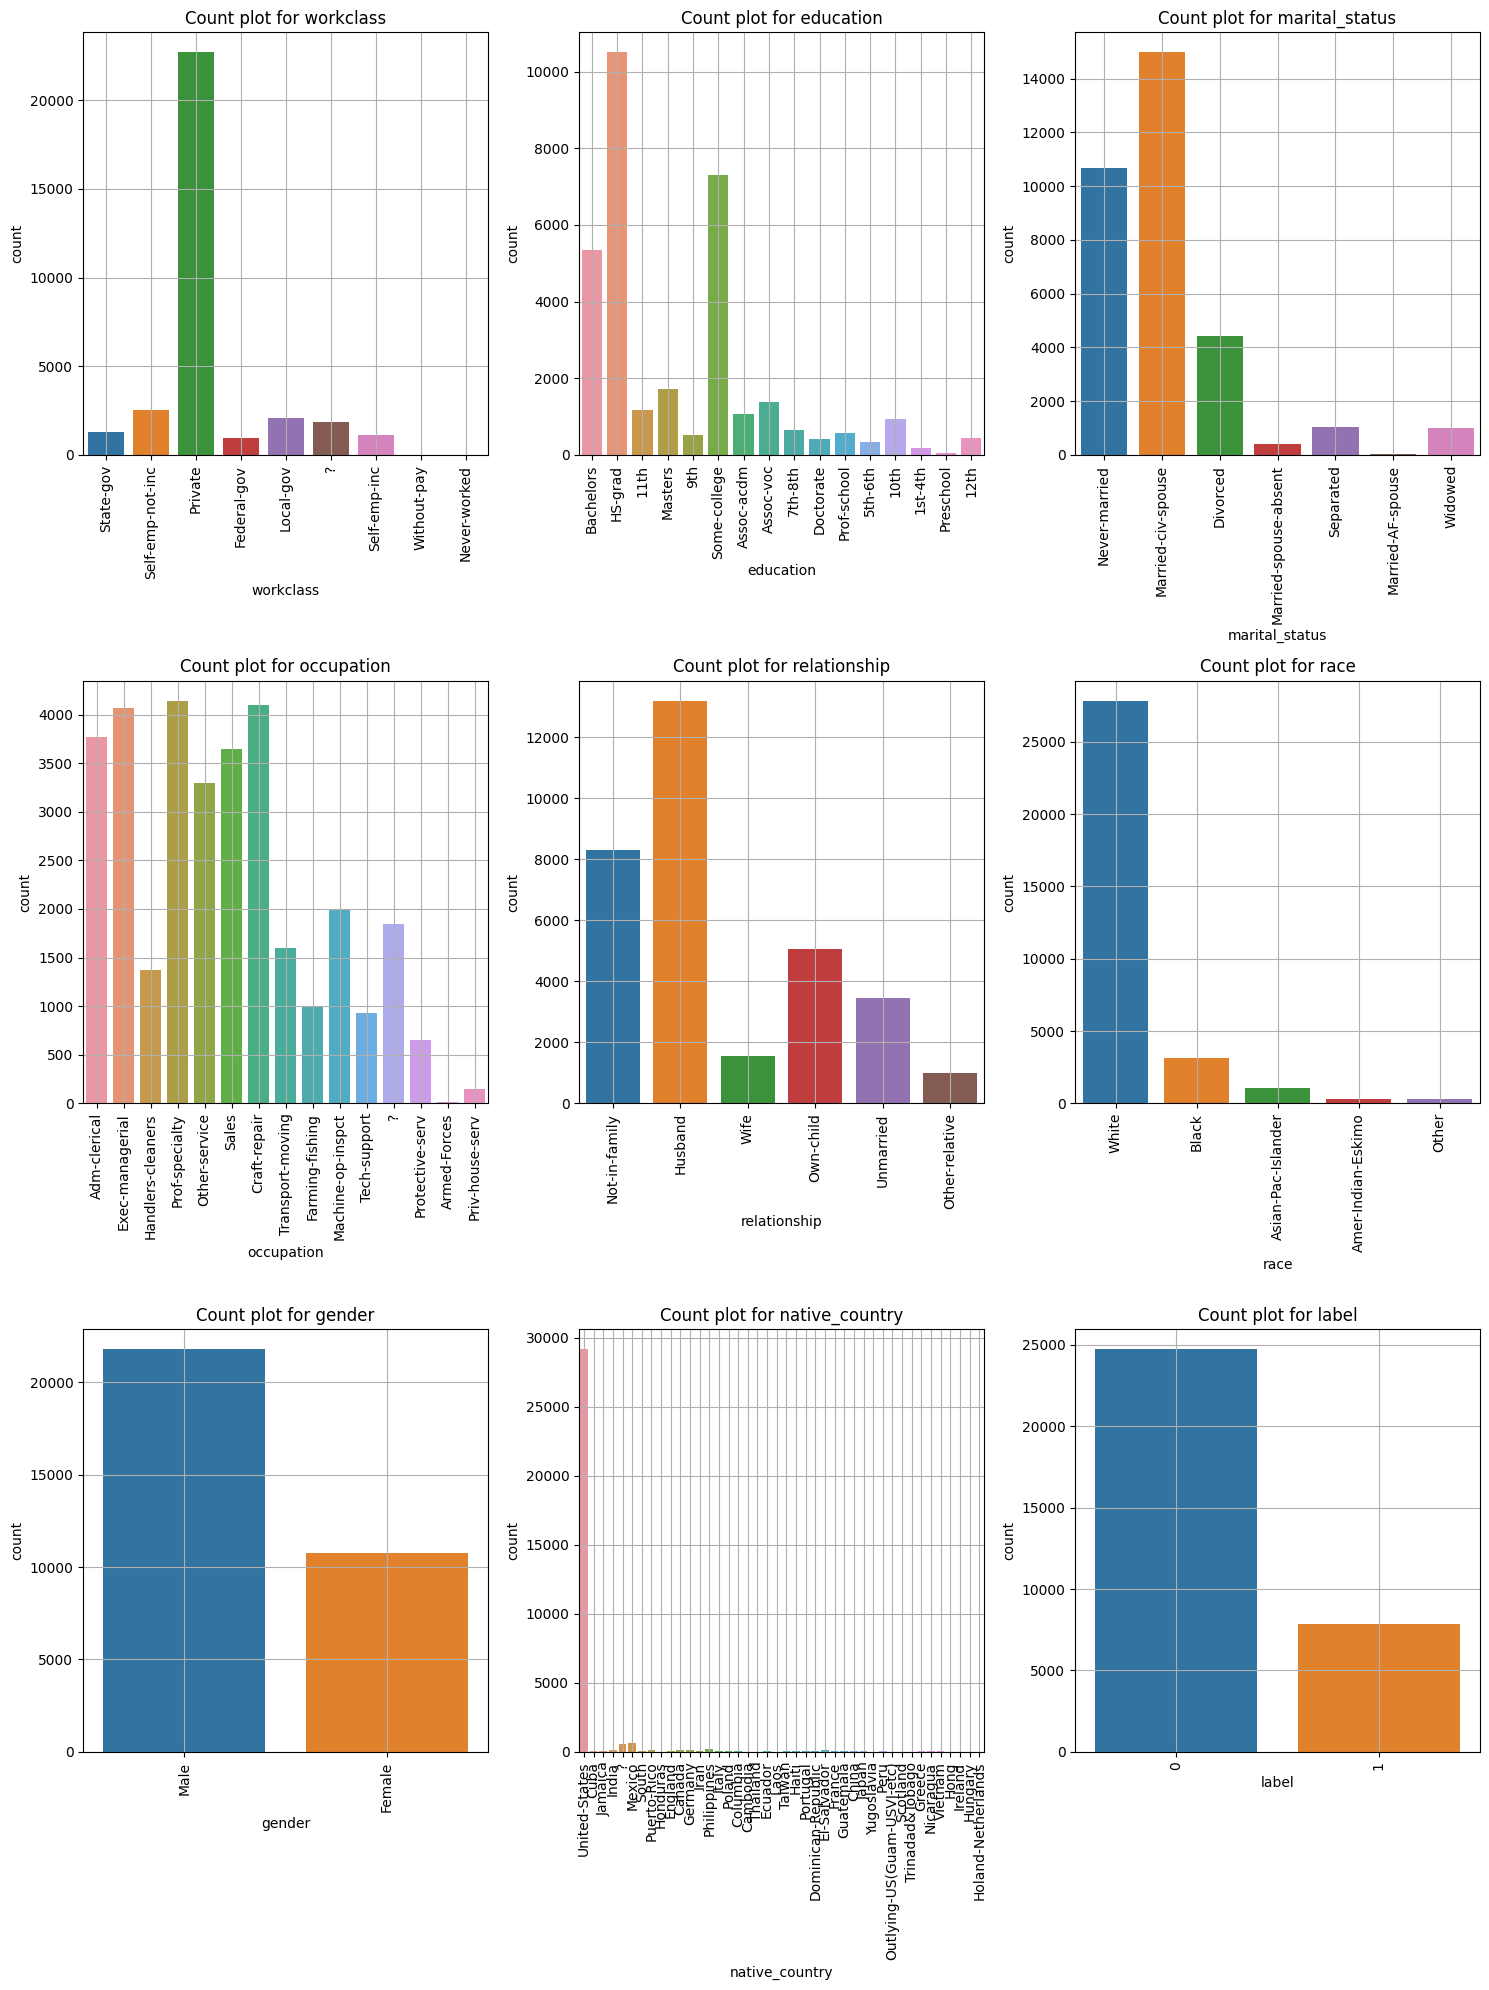

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
axes = axes.flatten()

# categorial feature columns
features = CATEGORICAL_COLUMNS + [LABEL_COLUMN]

for ax, feature in zip(axes, features):
    # Let's look at some of the general patterns against the label of race and gender
    # we want to explore fairness
    g = sns.countplot(data=train_df, x=feature, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    ax.set_title(f'Count plot for {feature}')

fig.tight_layout()

# Fairness Vs. Labels

In the context of the label we can certainly see that other races make less than `$50K`.

We can also see the same disparity for the `gender`

Text(0.5, 1.0, 'Labe Vs. Gender')

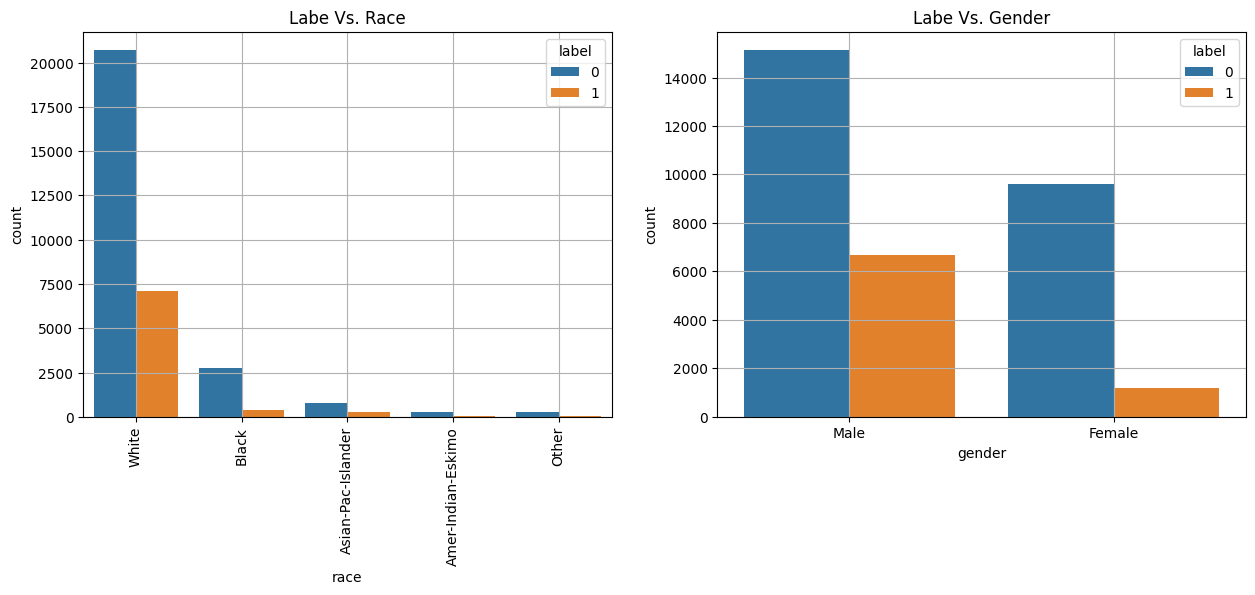

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# let's plot the labels vs. race
sns.countplot(data=train_df, x='race', hue='label', ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.grid()
ax1.set_title('Labe Vs. Race')

# let's plot the labels vs. gender
sns.countplot(data=train_df, x='gender', hue='label', ax=ax2)
ax1.tick_params(axis='x', rotation=90)
ax2.grid()
ax2.set_title('Labe Vs. Gender')

# Data Information

We can see from the `info` method below that there are no missing values in the dataset. So when we are performing transformations we should expect to see no missing values as well.

In [9]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income_bracket  32561 non-null  object
 15  label           32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

# Cleaning & Featurizing the Data

There is a notebook that performs the data cleaning and now that we have explore the dataset we can modify the data for our needs.

# Continuous Features

In this exercise we will observe the continuous features and biniarize them by using quantiles and cuts from `pandas`

[2 3 0 1]
[2 3 0 1]
[0 2 1 3]


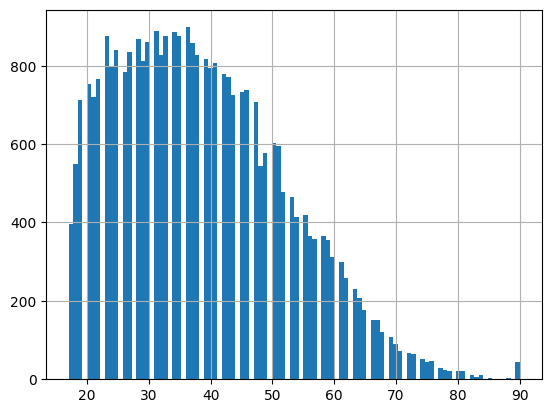

In [10]:
# Let's start with Age
train_df['age'].hist(bins=100)

# Let's use the train data to map the data to buckets
train_quantized, bins_quantized = pd.qcut(train_df['age'], 4, retbins=True, labels=False)

# Check the quantized values
print(train_quantized.unique())

# Let's use the bins quantized to map the data for train and test
train_age_quantized = pd.cut(train_df['age'], bins_quantized, labels=False, include_lowest=True)
print(train_age_quantized.unique())

# Is this the same as the qcut solution?
pd.testing.assert_series_equal(train_quantized, train_age_quantized)

# If the assertion is true then we will be able to run ths final row
test_age_quantized = pd.cut(test_df['age'], bins_quantized, labels=False, include_lowest=True)
print(test_age_quantized.unique())

# Now set the data for binarization later on
train_df['age'] = train_age_quantized.astype('category')
test_df['age'] = test_age_quantized.astype('category')

## Capital Gains

Most of the data for this feature is centered around zero. 

[1 0 3 2]
[0 2 1 3]


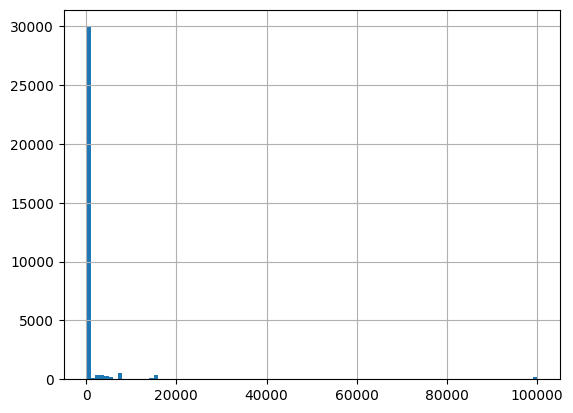

In [11]:
# Now let's look at capital gain
train_df['capital_gain'].hist(bins=100)
train_df['capital_gain'].describe()

# Create bins for this column
bins = [0, 1, 4000, 10000, 1000000]

# Do this for train & test
train_capital_gain_quantized = pd.cut(train_df['capital_gain'], bins, labels=False, include_lowest=True)
print(train_capital_gain_quantized.unique())

test_capital_gain_quantized = pd.cut(test_df['capital_gain'], bins, labels=False, include_lowest=True)
print(test_capital_gain_quantized.unique())

# Now set the data for binarization later on
train_df['capital_gain'] = train_capital_gain_quantized.astype('category')
test_df['capital_gain'] = test_capital_gain_quantized.astype('category')

## Capital Loss

[0 3 1 2]
[0 1 2 3]


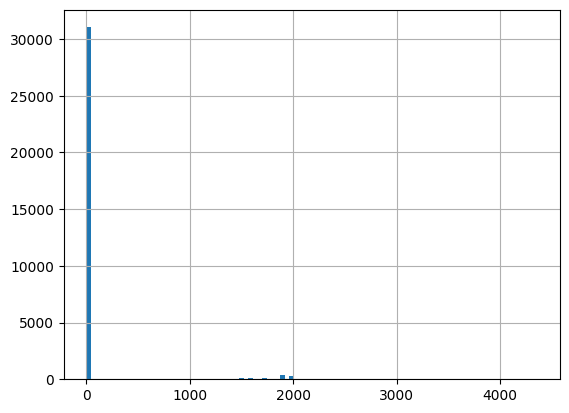

In [12]:
# Now let's look at capital loss
train_df['capital_loss'].hist(bins=100)
train_df['capital_loss'].describe()

# Create bins for this column
bins = [0, 1, 1800, 1950, 4500]

# Do this for train & test
train_capital_loss_quantized = pd.cut(train_df['capital_loss'], bins, labels=False, include_lowest=True)
print(train_capital_loss_quantized.unique())

test_capital_loss_quantized = pd.cut(test_df['capital_loss'], bins, labels=False, include_lowest=True)
print(test_capital_loss_quantized.unique())

# Now set the data for binarization later on
train_df['capital_loss'] = train_capital_loss_quantized.astype('category')
test_df['capital_loss'] = test_capital_loss_quantized.astype('category')

[1 0 2 3]
[1 2 0 3]


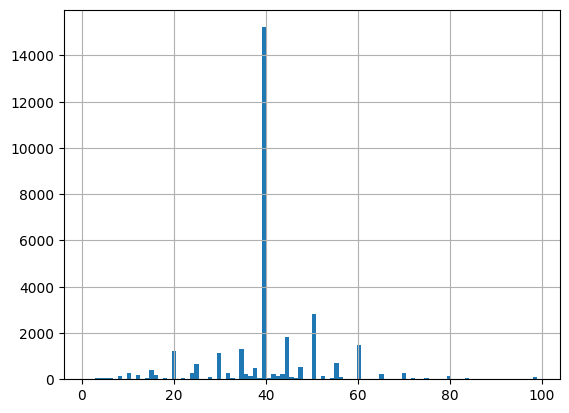

In [13]:
# Now let's look at hours per week
train_df['hours_per_week'].hist(bins=100)
train_df['hours_per_week'].describe()

# Create bins for this column
bins = [0, 39, 41, 50, 100]

# Do this for train & test
train_hours_per_week_quantized = pd.cut(train_df['hours_per_week'], bins, labels=False, include_lowest=True)
print(train_hours_per_week_quantized.unique())

test_hours_per_week_quantized = pd.cut(test_df['hours_per_week'], bins, labels=False, include_lowest=True)
print(test_hours_per_week_quantized.unique())

# Now set the data for binarization later on
train_df['hours_per_week'] = train_hours_per_week_quantized.astype('category')
test_df['hours_per_week'] = test_hours_per_week_quantized.astype('category')

## Education Number

[3 1 0 2]
[0 1 3 2]


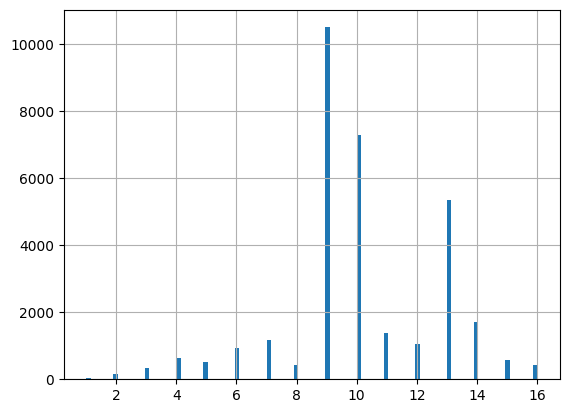

In [14]:
# Now let's look at education number
train_df['education_num'].hist(bins=100)
train_df['education_num'].describe()

# Create bins for this column
bins = [0, 8, 9, 11, 16]

# Do this for train & test
train_education_num_quantized = pd.cut(train_df['education_num'], bins, labels=False, include_lowest=True)
print(train_education_num_quantized.unique())

test_education_num_quantized = pd.cut(test_df['education_num'], bins, labels=False, include_lowest=True)
print(test_education_num_quantized.unique())

# Now set the data for binarization later on
train_df['education_num'] = train_education_num_quantized.astype('category')
test_df['education_num'] = test_education_num_quantized.astype('category')

# Binarize the Categorical Columns

In [15]:
BINARIZED_FEATURES = CATEGORICAL_COLUMNS + CONTINUOUS_COLUMNS + [LABEL_COLUMN]

# Get the train and test categorical columns
categorical_train_df = train_df[BINARIZED_FEATURES].copy()
categorical_test_df = test_df[BINARIZED_FEATURES].copy()

# Make sure we can distinguish between train and test afterward
categorical_train_df['is_train'] = 1
categorical_test_df['is_train'] = 0

# Make sure all of the columns are the same
assert np.all(categorical_train_df.columns == categorical_test_df.columns)

# Concatenate the data and binarize all columns with get dummies
categorical_df = pd.concat([categorical_train_df, categorical_test_df])

# Make sure there are still no missing values
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       48842 non-null  object  
 1   education       48842 non-null  object  
 2   marital_status  48842 non-null  object  
 3   occupation      48842 non-null  object  
 4   relationship    48842 non-null  object  
 5   race            48842 non-null  object  
 6   gender          48842 non-null  object  
 7   native_country  48842 non-null  object  
 8   age             48842 non-null  category
 9   capital_gain    48842 non-null  category
 10  capital_loss    48842 non-null  category
 11  hours_per_week  48842 non-null  category
 12  education_num   48842 non-null  category
 13  label           48842 non-null  int64   
 14  is_train        48842 non-null  int64   
dtypes: category(5), int64(2), object(8)
memory usage: 4.3+ MB


In [16]:
# Build the one-hot encoded categorical features
categorical_df = pd.get_dummies(categorical_df)

# Check there are no missing values
# Output should be zero
categorical_df.isnull().sum().sum()

0

In [17]:
categorical_df.head()

,label,is_train,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,capital_loss_2,capital_loss_3,hours_per_week_0,hours_per_week_1,hours_per_week_2,hours_per_week_3,education_num_0,education_num_1,education_num_2,education_num_3
0,0,1,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,1,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,0,1,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,0,1,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,0,1,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [18]:
# Split data back to train and test and save
train_df = categorical_df.query('is_train == 1').drop(columns=['is_train']).reset_index(drop=True)
test_df = categorical_df.query('is_train == 0').drop(columns=['is_train']).reset_index(drop=True)

train_df.head()

,label,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,capital_loss_2,capital_loss_3,hours_per_week_0,hours_per_week_1,hours_per_week_2,hours_per_week_3,education_num_0,education_num_1,education_num_2,education_num_3
0,0,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,0,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,0,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
# Check final stats one more time
print(train_df.info())
print(train_df.describe())

print('-' * 100)

print(test_df.info())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 123 entries, label to education_num_3
dtypes: bool(122), int64(1)
memory usage: 4.0 MB
None
              label
count  32561.000000
mean       0.240810
std        0.427581
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Columns: 123 entries, label to education_num_3
dtypes: bool(122), int64(1)
memory usage: 2.0 MB
None
              label
count  16281.000000
mean       0.236226
std        0.424776
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


# Save the Data

In [20]:
train_df.to_parquet('./data/adult/adult-train.parquet')
test_df.to_parquet('./data/adult/adult-test.parquet')